# Data facilitation: Accommodating data and use of RegEx.

### Activity 1 in class: 
**Objective:** Having generated basic descriptive and statistical analyses of a first set, we are going to treat categorical variables such that we can leave them usable for a future model.



In [1]:
import pandas as pd
import numpy as np
import re 
import os
import matplotlib.pyplot as plt
import unidecode
from math import isnan

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# We read the cleaned files from the last class
files = {'investments': 'cleaned_inversiones',
        'gender_and_personal': 'cleaned_genero'}

# Basedir to modify
basedir = '.'

# We will read the csvs and save them in this dictionary
frames = {}
for file_type, file_name in files.items():
    print(f'-> Reading file of type `{file_type}`.\n')
    
    file_dir = os.path.join(basedir, file_name + '.csv')
    frames[file_type] = pd.read_csv(file_dir, encoding='latin1')
    
print(f'-> Files read.')

-> Reading file of type `investments`.

-> Reading file of type `gender_and_personal`.

-> Files read.


##### Comencemos analizando la base de datos de inversiones solo en su componente categórico

In [3]:
# Copy so as not to modify the original frame
df=frames['investments'].copy()

# Let's keep only the categories that are there.
object_df=df.select_dtypes(include=['object']).copy()

In [4]:
# Let's apply a head to see what's there
object_df.head()

,inmueble,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,beneficiarios_alimentos_dif_2014,aulas_interactivas_observacion,aulas_provisionales_observacion,conectividad,observacion_pec2013,observacion_pec2014,observacion_mobiliario
0,1406848K,AHUALULCO DE MERCADO,14DPR0273Q,R,MATUTINO,5 DE MAYO,ANGELICA IVETT FLORES CARDENAS,PRIMARIA,BENEFICIARIOS = 60 / ALIMENTO CALIENTE,NaN,NaN,eJALISCO = 2 MB INSTALADO /,NaN,NaN,PIEZAS = 569 ALUMNOS =304 MATRICULA = 304
1,1406850C,AHUALULCO DE MERCADO,14EPR0482V,R,MATUTINO,VALENTIN GOMEZ FARIAS,MARIA EDITH CRUZ CASTAÃÂEDA,PRIMARIA,BENEFICIARIOS = 30 / ALIMENTO CALIENTE,NaN,NaN,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,PEC XIII (2013 -2014) / APOYO TÃÂCNICO PEDAG...,NaN,PIEZAS = 179 ALUMNOS =93 MATRICULA = 93
2,1406852K,AHUALULCO DE MERCADO,14EJN0200G,R,MATUTINO,EMILIANO ZAPATA,HILDA GARCIA VEGA,PREESCOLAR,BENEFICIARIOS = 20 / ALIMENTO FRIO,NaN,NaN,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,PEC XIII (2013 -2014) / APOYO TÃÂCNICO PEDAG...,NaN,PIEZAS = 204 ALUMNOS =142 MATRICULA = 142
3,1406854H,AHUALULCO DE MERCADO,14DJN0155L,R,MATUTINO,JAVIER URIBE,MARIA ELENA ARELLANO NUÃÂEZ,PREESCOLAR,BENEFICIARIOS = 60 / ALIMENTO CALIENTE,NaN,NaN,eJALISCO = 2 MB INSTALADO /,NaN,NaN,PIEZAS = 168 ALUMNOS =117 MATRICULA = 117
4,1406855A,AHUALULCO DE MERCADO,14EPR0014B,R,MATUTINO,JOSE MA MERCADO,MARIA CONSEPCION PINZON RODRIGUEZ,PRIMARIA,BENEFICIARIOS = 40 / ALIMENTO CALIENTE,NaN,NaN,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,NaN,PEC XIV (2014 - 2015) / APOYO TÃÂCNICO PEDAG...,PIEZAS = 518 ALUMNOS =276 MATRICULA = 344


When working with exclusively categorical data, it is necessary to analyze a concept called _cardinality_. 

In a few words, it is to see how many different values there are. We can see them in absolute form (simple count) or in relative form (with respect to the total number of rows in our frame).

In [5]:
for variable in object_df:
    unique_vals=object_df[variable].unique()
    relative = np.round(100*len(unique_vals)/len(object_df))
    
    print(f'unique values of "{variable}":{len(unique_vals)}. Relative:{relative}%')

unique values of "inmueble":7311. Relative:77.0%
unique values of "municipio":125. Relative:1.0%
unique values of "clave_ct":9191. Relative:97.0%
unique values of "responsable":2. Relative:0.0%
unique values of "turno":5. Relative:0.0%
unique values of "nombre_ct":2143. Relative:23.0%
unique values of "director":8274. Relative:87.0%
unique values of "nivel":3. Relative:0.0%
unique values of "beneficiarios_alimentos_dif_2014":335. Relative:4.0%
unique values of "aulas_interactivas_observacion":40. Relative:0.0%
unique values of "aulas_provisionales_observacion":267. Relative:3.0%
unique values of "conectividad":187. Relative:2.0%
unique values of "observacion_pec2013":497. Relative:5.0%
unique values of "observacion_pec2014":598. Relative:6.0%
unique values of "observacion_mobiliario":1740. Relative:18.0%


High cardinality in at least 5 variables, let's do a quick treatment to eliminate possible misspelled data.

* Note also that there are many municipalities / names of persons with special characters.


##### Simple text standardization

We did something similar with column names in the last session, now we will do it for text values in our table. 


We will create a _dummy_ dataframe to see what we are doing. 

In [6]:
dummy_df=df.copy()

In [7]:
# Estandarizando texto
example_column  = 'director'
dummy_df[example_column  + '_clean'] = df[example_column ].apply(lambda x:unidecode.unidecode(x).strip().replace(' ','_'))

dummy_df[[example_column ,example_column +'_clean']]

,director,director_clean
0,ANGELICA IVETT FLORES CARDENAS,ANGELICA_IVETT_FLORES_CARDENAS
1,MARIA EDITH CRUZ CASTAÃÂEDA,MARIA_EDITH_CRUZ_CASTAAAEDA
2,HILDA GARCIA VEGA,HILDA_GARCIA_VEGA
3,MARIA ELENA ARELLANO NUÃÂEZ,MARIA_ELENA_ARELLANO_NUAAEZ
4,MARIA CONSEPCION PINZON RODRIGUEZ,MARIA_CONSEPCION_PINZON_RODRIGUEZ
...,...,...
9484,CECILIA FIGUEROA HERNANDEZ,CECILIA_FIGUEROA_HERNANDEZ
9485,JUAN CRUZ LOPEZ BASTIDAS,JUAN_CRUZ_LOPEZ_BASTIDAS
9486,PEDRO FABIAN AGUIRRE AGUIRRE,PEDRO_FABIAN_AGUIRRE_AGUIRRE
9487,JOSUE MANUEL MONTAÃÂO PEREZ,JOSUE_MANUEL_MONTAAAO_PEREZ


We changed the "sense" of some texts, but the important thing is that we did it in a consistent way and actually we as data scientists are not affected by the fact that there is no "ñ". 

The important thing now is to see if we did something useful with it or not. 

In [8]:
for column in [example_column,example_column + '_clean']:
    unique_vals=dummy_df[column].unique()
    print(f'unique vals of "{column}":{len(unique_vals)}')

unique vals of "director":8274
unique vals of "director_clean":8274


In this case we did not do anything (lol), but it is important to do this because we are extremely exposed to the texts being captured incorrectly or differently. We will apply this through a class to columns like `MUNICIPALITY`, `CT_NAME` and others. 

### Regular expressions

Regular expressions are hints with which we can extract text from strings based on patterns. They have specific commands, we will use them through the `re` package. 

If you want to get more information about the commands used or other _hacks_ you can achieve using this tool, I recommend you to check: https://regexone.com/references/python.

#### Beneficiaries
Let's recap what's here: 

In [9]:
df['beneficiarios_alimentos_dif_2014'].unique().tolist()

['BENEFICIARIOS = 60 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 30 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 20 / ALIMENTO FRIO',
 'BENEFICIARIOS = 40 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 30 / ALIMENTO FRIO',
 'BENEFICIARIOS = 50 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 100 / ALIMENTO CALIENTE',
 nan,
 'BENEFICIARIOS = 60 / ALIMENTO FRIO',
 'BENEFICIARIOS = 10 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 20 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 15 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 5 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 75 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 80 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 65 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 170 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 160 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 25 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 120 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 35 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 105 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 33 / ALIMENTO CALIENTE',
 'BENEFICIARIOS = 51 / ALIMENTO CALIENTE',
 'BENEFICIARI

Observamos que hay dos cuestiones importantes a identificar: 
* Cantidad de beneficiarios y el tipo de alimento existente. 

Usaremos a nuestro nuevo mejor amigo `RegEx` para extraer la información.

In [10]:
string = 'BENEFICIARIOS = 160 / ALIMENTO CALIENTE'
#r:expresion regular, tome las diagonales como un comando
#d:digitos
#+:una o más ocurrencias
#traer todos los digitos que aparecen una o más veces
digit_regex = r'\d+'
digits = re.findall(digit_regex,string)
print(digits)

# Regex para obtener el dígito
# La "r" funciona parecido a la "f" de f-strings. 
# Esto es para indicar que estamos tratando con una expresión regular y
# no tengamos problema con el uso de "\"

# Aplicando RegEx

['160']


Esta magia nos devuelve una lista con las coincidencias del patrón especificado. En este caso:
* `\d`: Indica que estamos buscando dígitos, cualquiera.
* `+`: Indica una o más coincidencias (en este caso, de los dígitos).

In [11]:
# Hagamos lo mismo, pero con otro ejemplo para identificar el tipo de alimento
alimento_regex= r'(CALIENTE|FRIO)'
alimentos =re.findall(alimento_regex,string)
alimentos

['CALIENTE']

En este caso, tenemos dos nuevos ejemplos: 
* Uso de paréntesis. Esto extrae subgrupos, nos permiten identificar subpatrones como un grupo individual (más usado cuando tenemos varias detecciones de patrones en un mismo RegEx, no es el caso de este ejemplo). 
* `|`: Indica el operador lógico "OR".

#### Aulas interactivas observación
Tomes esta otra variable de nuestro set y repitamos el ejercicio de RegEx.

In [12]:
df['aulas_interactivas_observacion'].unique().tolist()

[nan,
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 18',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 5',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 11',
 'ESTADO = EN PROCESO DE INSTALACION / AULAS INTERACTIVAS = 6',
 'ESTADO = EN PROCESO DE INSTALACION / AULAS INTERACTIVAS = 2',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 6',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 9',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 7',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 4',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 3',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 2',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 8',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 15',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 14',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 10',
 'ESTADO = EN PROCESO DE INSTALACION / AULAS INTERACTIVAS = 5',
 'ESTADO = EN PROCESO DE INSTALACION / AULAS INTERACTIVAS = 4',
 'ESTADO = EN PROCESO DE INSTALACION / AULAS INTERACTIVAS = 3',
 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 1

Hay un patrón de texto importante: "INSTALADO" y un número. 

In [13]:
string = 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 8'
instalado_str = r'.*?INSTALADO.*?(\d+)'
resultado=re.findall(instalado_str,string)
resultado

['8']

En este caso: 

* `.`: Esto equivale a decir "cualquier caracter". 
* `*`: Equivale a cero o más repeticiones de lo anterior.
* `?`: Implica que un caracter pueda ser opcional.
* `INSTALATADO`: El patrón de texto específico.
* Uso de paréntesis: Lo que queremos extraer es el subgrupo de uno o más números que contengan los patrones anteriores, aquí sí nos sirven.

¿Qué pasa si le agrego varias aulas? 

In [14]:
string = 'ESTADO = INSTALADO / AULAS INTERACTIVAS = 8 / ESTADO = INSTALADO / AULAS INTERACTIVAS = 2'
resultado=re.findall(instalado_str,string)
resultado

# Usemos una suma y un list comprehension y se arma: 
sum((float(res) for res in resultado))


10.0

#### Aulas provisionales observación
Esta es una joyita sin duda: 

In [15]:
df['aulas_provisionales_observacion'].unique().tolist()

[nan,
 'TOTAL DE AULAS = 2/ POR SUSTITUIR USO EDUC = 2/ OTRO USO = 0/ OBSERVACIONES USO EDUCATIVO/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =2',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 1/ OTRO USO = 0/ OBSERVACIONES USO EDUCATIVO/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =1',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 1/ OTRO USO = 0/ OBSERVACIONES USO EDUCATIVO, UNA FOTO NO CORRESPONDE/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =1',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 0/ OTRO USO = 1/ OBSERVACIONES BODEGA/AULA AUDIOVISUAL/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =0',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 0/ OTRO USO = 1/ OBSERVACIONES BODEGA/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =0',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 0/ OTRO USO = 1/ OBSERVACIONES BIBLIOTECA/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =0',
 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 0/ OTRO USO = 0/ OBSERVACIONES USO EDUCATIVO, EXCELENCIA 2014, NO REPORTA FOTOS/ SUST 2013 =0/ SUST 2014 =

There are a lot of patterns to follow here: 
* CLASSROOMS.
* FOR SUBSTITUTE EDUC. USE.
* OTHER USE.
* SUST followed by a year.

It's not worth the particulars because they have too many changes from each other. We do not have enough life.

In [16]:
string = 'TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 1/ OTRO USO = 0/ OBSERVACIONES USO EDUCATIVO, NO REPORTA FOTOS/ SUST 2013 =0/ SUST 2014 =0/ SUST 2015 =0'
regex = r'.*?TOTAL DE AULAS.*?(\d+)'
resultado=re.findall(regex,string)
resultado = sum([float(res) for res in resultado])
resultado


1.0

In [17]:
instalado_str = r'.*?TOTAL DE AULAS.*?(\d+)'
re.findall(instalado_str,string)

['1']

In [18]:
year= 2013
instalado_str = r'.*?SUST %s.*?(\d+)'% 2013
re.findall(instalado_str,string)

['0']

#### Connectivity
Let's continue with our variables. What can we extract from this variable?

In [19]:
df['conectividad'].unique().tolist()

['eJALISCO = 2 MB INSTALADO /',
 'eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /',
 'eJALISCO = 2 MB INSTALADO /eMEXICO = 0,512 MB INSTALADO /INTERNET PARTICULAR /',
 nan,
 'eJALISCO = 2 MB INSTALADO /MC2 = 20 MB INSTALADO /',
 'eJALISCO = 2 MB INSTALADO /MC2 = 20 MB INSTALADO /INTERNET PARTICULAR /',
 'eJALISCO = 10 MB INSTALADO /MC2 = 20 MB INSTALADO /',
 'eMEXICO = 0,512 MB INSTALADO /',
 'eJALISCO = 2 MB INSTALADO /eMEXICO = 1 MB INSTALADO /',
 'eJALISCO = 0,512 MB INSTALADO /',
 'eMEXICO = 1 MB INSTALADO /',
 'eJALISCO = 2 MB INSTALADO /eMEXICO = 0,512 MB INSTALADO /',
 'INTERNET PARTICULAR /',
 'eJALISCO = 10 MB INSTALADO /MC2 = 20 MB INSTALADO /INTERNET PARTICULAR /',
 'eJALISCO = 10 MB INSTALADO /eMEXICO = 0 MB TRANSFERIDO A LA RED MC2 /MC2 = 20 MB INSTALADO /INTERNET PARTICULAR /',
 'eMEXICO = 0,512 MB INSTALADO /INTERNET PARTICULAR /',
 'MC2 = 1 MB INSTALADO /',
 'eJALISCO = 2 MB INSTALADO /eMEXICO = 0 MB TRANSFERIDO A LA RED MC2 /MC2 = 1 MB INSTALADO /',
 'eJALISCO = 2 MB 

Text pattern of megabytes installed.

In [20]:
string = 'eJALISCO = 0,2 MB INSTALADO /MC2 = 20 MB INSTALADO /'
regex = r'(,?\d+)\sMB\s*INSTALADO'
patterns = re.findall(regex,string)
patterns

[',2', '20']

In this case: 

* ``s`: Allows us to capture any blank space. 
* `?`: Returns optional the immediately preceding character, in this case the comma and the space. 
* `(...)`: Extracts the subset formed by whatever is inside the parenthesis. 

In [21]:
# Simple, I just do a sum as I have done so far and it is assembled: 
sum_internet=sum([float(x.replace(',','.'))for x in patterns])
sum_internet

20.2

#### Observaciones PEC

In [22]:
df['observacion_pec2013'].unique().tolist()

[nan,
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=94',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=144',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=72',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=313',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=57',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=212',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=67',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=183',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=178',
 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFIC

In [23]:
string = 'PEC XIII (2013 -2014) / APOYO TÃ\x83Â\x89CNICO PEDAGÃ\x83Â\x93GICO Y FINANCIERO BENEFICIADOS=94'
regex = r'BENEFICIADOS=(\d+)'
patterns=re.findall(regex,string)
patterns

sum_patterns = sum([float(x) for x in patterns])
sum_patterns

94.0

This one is good for 2013 and 2014, we add to the class and continue. 

#### Observaciones mobiliario

In [24]:
df['observacion_mobiliario'].unique().tolist()

['PIEZAS = 569 ALUMNOS =304 MATRICULA = 304',
 'PIEZAS = 179 ALUMNOS =93 MATRICULA = 93',
 'PIEZAS = 204 ALUMNOS =142 MATRICULA = 142',
 'PIEZAS = 168 ALUMNOS =117 MATRICULA = 117',
 'PIEZAS = 518 ALUMNOS =276 MATRICULA = 344',
 nan,
 'PIEZAS = 550 ALUMNOS =294 MATRICULA = 391',
 'PIEZAS = 132 ALUMNOS =90 MATRICULA = 145',
 'PIEZAS = 375 ALUMNOS =205 MATRICULA = 205',
 'PIEZAS = 370 ALUMNOS =195 MATRICULA = 195',
 'PIEZAS = 92 ALUMNOS =62 MATRICULA = 62',
 'PIEZAS = 331 ALUMNOS =178 MATRICULA = 178',
 'PIEZAS = 237 ALUMNOS =162 MATRICULA = 162',
 'PIEZAS = 30 ALUMNOS =20 MATRICULA = 57',
 'PIEZAS = 250 ALUMNOS =174 MATRICULA = 174',
 'PIEZAS = 760 ALUMNOS =706 MATRICULA = 939',
 'PIEZAS = 354 ALUMNOS =189 MATRICULA = 189',
 'PIEZAS = 104 ALUMNOS =69 MATRICULA = 69',
 'PIEZAS = 137 ALUMNOS =122 MATRICULA = 122',
 'PIEZAS = 72 ALUMNOS =36 MATRICULA = 36',
 'PIEZAS = 25 ALUMNOS =19 MATRICULA = 19',
 'PIEZAS = 26 ALUMNOS =17 MATRICULA = 17',
 'PIEZAS = 28 ALUMNOS =14 MATRICULA = 14',
 'PIE

There are 3 text patterns that interest us:
* Pieces.
* Students (WTF?).
* Enrollment.

In [25]:
string ='PIEZAS = 137 ALUMNOS =122 MATRICULA = 122'
pattern_to_look='PIEZAS'
regex= '%s.*?(\d+)'% pattern_to_look #if there are spaces or not, digit only

patterns= re.findall(regex,string)

sum_patterns = sum([float(x) for x in patterns])
sum_patterns

137.0

Some of the locations are coming along beautifully. Our friends from the State Government put information with brackets, something like this:

City: CUQUIO (CENTRAL ZONE).

That will create conflict for obvious reasons. For simplicity we will start backwards detecting what we don't want. 

In [26]:
# Example
string = 'CUQUIO (ZONA CENTRO)' #remove the ()
regex = r'\s*?\(.*\)' #\Along with the parenthesis

finding = re.findall(regex,string)
finding

[' (ZONA CENTRO)']

So far we have a text with parentheses which we can replace with an empty text and that's it. What happens if there are more texts with parentheses? 

In [27]:
string = 'CUQUIO (ZONA CENTRO) (hi jiji)'
finding = re.findall(regex,string)
finding

[' (ZONA CENTRO) (hi jiji)']

However it is a list, let's replace it with strings. 

In [28]:
joined_findings= ''.join(finding)
joined_findings

' (ZONA CENTRO) (hi jiji)'

Ahora sí reemplacemos. 

In [29]:
new_string = string.replace(joined_findings,'')
new_string

'CUQUIO'


What happens with texts that do not have parentheses?


In [30]:
string = 'CUQUIO'
finding = re.findall(regex,string)
joined_findings= ''.join(finding)
new_string = string.replace(joined_findings,'')
new_string

'CUQUIO'

So far we have made different regular expressions (`RegEx`) to analyze our database. 

Let's recap the names of the columns we are going to work on and test our class. 

### We will generate functions for each column and will clean up 

In [31]:
def beneficiarios(df, col):
    _DIGIT_REGEX = r'\d+'
    _ALIMENTO_REGEX = r'(CALIENTE|FRIO)'
    
    df[f'{col}_digit'] = df[col].apply(
        lambda x: re.findall(_DIGIT_REGEX, x)[0] 
        if x not in [np.nan, None] else x).astype('float64')
    
    df[f'{col}_name']=df[col].apply(
        lambda x: re.findall(_ALIMENTO_REGEX, x)[0] 
        if x not in [np.nan, None] else x)
    
    return df

In [32]:
def aulas_general(df, col, name, tipo):
    """
    Works w/strings:
    
    * AULAS
    * POR SUSTITUIR USO EDUC
    * OTRO USO
    * SUST <<YEAR>>
    
    
    AQUI LES AGREGAS SOLO EL REGEX
    """
    # REGEX 
    _REGEX = r'.*?%s.*?(\d+)' % tipo
    
    extraction = df[col].apply(lambda x: re.findall(_REGEX, x)
                                   if x not in [np.nan, None] 
                            else x)
    
    
    df[f'{col}_{name}'] = extraction.apply(lambda x: x[0] 
                                         if isinstance(x, list) and len(x) > 0
                                         else None).astype('float64')
    return df


In [33]:
def get_mbs_instalados(df, col, name='mbs'):
    """
    """

    _REGEX = r'(,?\d+)\s?MB\s*INSTALADO'
    extraction = df[col].apply(lambda x: re.findall(_REGEX, x)
                                   if x not in [np.nan, None] 
                            else x)
    
    
    df[f'{col}_{name}'] = extraction.apply(lambda x: sum([float(y.replace(',', '.')) for y in x]) 
                                         if isinstance(x, list) and len(x) > 0
                                         else None).astype('float64')
    return df


In [34]:
def pec_processing(df, col, name):
    """
    """
    _REGEX= 'BENEFICIADOS=(\d+)'
    extraction = df[col].apply(lambda x: re.findall(_REGEX, x)
                                   if x not in [np.nan, None]
                                   or (not isnan(x))
                            else x)
    
    
    df[f'{col}_{name}'] = extraction.apply(lambda x: x[0] 
                                         if isinstance(x, list) and len(x) > 0
                                         else None).astype('float64')
    return df

In [35]:
def mobiliario(df, col):
    """
    solo el regex
    """
    _REGEX= '%s.*?(\d+)'
    type_of_pattern = ['PIEZAS', 'ALUMNOS', 'MATRICULA']
    
    for name in type_of_pattern:
        specific_regex = _REGEX % name
        
        # Mismo copy de antes solo agregando el lower
        extraction = df[col].apply(lambda x: re.findall(specific_regex, x)
                                   if x not in [np.nan, None]
                                   or (not isnan(x))
                            else x)
    
    
        df[f'{col}_{name.lower()}'] = extraction.apply(lambda x: x[0] 
                                         if isinstance(x, list) and len(x) > 0
                                         else None).astype('float64')
    

    return df


In [36]:
def simple_string(string):
    
    _REGEX= r'\s*?\(.*\)'
    
    finding = re.findall(regex,string)
    joined_findings= ''.join(finding)
    
    new_string = unidecode.unidecode(string.replace(joined_findings, '').lower().strip()).replace(' ','_')
#quitando caracteres
    return new_string

def simple_string_generalized(df, col):

    
    df[f'{col}_cleaned'] = df[col].apply(lambda x: simple_string(x)
                           if x not in [np.nan, None]
                    else x)
    

    return df


In [37]:
# Beneficiarios 
df = beneficiarios(df,'beneficiarios_alimentos_dif_2014')
df

,Unnamed: 0,inmueble,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,matricula,...,inversion_escuelas_de_tiempo_completo_2015_(recurso_2014),inversion_programa_escuela_digna_2015,inversion_faeb_2015,inversion_fonden_2015,inversion_infraestructura_educativa_estatal_2015_(recurso_2013),inversion_programa_escuelas_de_excelencia_2015_(recurso_2014),inversion_programa_sana_2015,otros_programas,beneficiarios_alimentos_dif_2014_digit,beneficiarios_alimentos_dif_2014_name
0,0,1406848K,AHUALULCO DE MERCADO,14DPR0273Q,R,MATUTINO,5 DE MAYO,ANGELICA IVETT FLORES CARDENAS,PRIMARIA,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,CALIENTE
1,1,1406850C,AHUALULCO DE MERCADO,14EPR0482V,R,MATUTINO,VALENTIN GOMEZ FARIAS,MARIA EDITH CRUZ CASTAÃÂEDA,PRIMARIA,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,CALIENTE
2,2,1406852K,AHUALULCO DE MERCADO,14EJN0200G,R,MATUTINO,EMILIANO ZAPATA,HILDA GARCIA VEGA,PREESCOLAR,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,FRIO
3,3,1406854H,AHUALULCO DE MERCADO,14DJN0155L,R,MATUTINO,JAVIER URIBE,MARIA ELENA ARELLANO NUÃÂEZ,PREESCOLAR,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,CALIENTE
4,4,1406855A,AHUALULCO DE MERCADO,14EPR0014B,R,MATUTINO,JOSE MA MERCADO,MARIA CONSEPCION PINZON RODRIGUEZ,PRIMARIA,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,CALIENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,9484,1413374C,TONALA,14DJN2279H,L,VESPERTINO,JORGE WILMONT MASON,CECILIA FIGUEROA HERNANDEZ,PREESCOLAR,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9485,9485,1413375G,TONALA,14EES0086O,R,MATUTINO,HERMINIO LARIOS,JUAN CRUZ LOPEZ BASTIDAS,SECUNDARIA,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9486,9486,1413376K,TONALA,14DPR4197B,R,MATUTINO,JUAN SORIANO,PEDRO FABIAN AGUIRRE AGUIRRE,PRIMARIA,227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,FRIO
9487,9487,1413376K,TONALA,14DPR4206T,L,VESPERTINO,LUIS HECTOR ALVAREZ ALVAREZ,JOSUE MANUEL MONTAÃÂO PEREZ,PRIMARIA,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Aulas
columns = ['aulas_interactivas_observacion', 'aulas_provisionales_observacion']       
for col in columns:
    df = aulas_general(df, col, 'aulas', 'AULAS')
    df = aulas_general(df, col, 'por_sustituir', 'POR SUSTITUIR USO EDUC')
    df = aulas_general(df, col, 'sust_2013', 'SUST 2013')
    df = aulas_general(df, col, 'sust_2014', 'SUST 2014')
    df = aulas_general(df, col, 'sust_2015', 'SUST 2015')
    df = aulas_general(df, col, 'otro_uso', 'OTRO USO')
                       

In [39]:
tmp = columns + ['aulas_interactivas_observacion_aulas',
       'aulas_interactivas_observacion_por_sustituir',
       'aulas_provisionales_observacion_aulas',
       'aulas_provisionales_observacion_por_sustituir',
       'aulas_interactivas_observacion_sust_2013',
       'aulas_interactivas_observacion_sust_2014',
       'aulas_interactivas_observacion_sust_2015',
       'aulas_interactivas_observacion_otro_uso',
       'aulas_provisionales_observacion_sust_2013',
       'aulas_provisionales_observacion_sust_2014',
       'aulas_provisionales_observacion_sust_2015',
       'aulas_provisionales_observacion_otro_uso']


In [40]:
df.loc[[9173,9174],tmp]

,aulas_interactivas_observacion,aulas_provisionales_observacion,aulas_interactivas_observacion_aulas,aulas_interactivas_observacion_por_sustituir,aulas_provisionales_observacion_aulas,aulas_provisionales_observacion_por_sustituir,aulas_interactivas_observacion_sust_2013,aulas_interactivas_observacion_sust_2014,aulas_interactivas_observacion_sust_2015,aulas_interactivas_observacion_otro_uso,aulas_provisionales_observacion_sust_2013,aulas_provisionales_observacion_sust_2014,aulas_provisionales_observacion_sust_2015,aulas_provisionales_observacion_otro_uso
9173,ESTADO = INSTALADO / AULAS INTERACTIVAS = 18,TOTAL DE AULAS = 2/ POR SUSTITUIR USO EDUC = 2...,18.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
9174,ESTADO = INSTALADO / AULAS INTERACTIVAS = 18,TOTAL DE AULAS = 2/ POR SUSTITUIR USO EDUC = 2...,18.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [41]:
# Conectividad 
df = get_mbs_instalados(df, 'conectividad')

In [42]:
df.loc[[51,273,9465],['conectividad','conectividad_mbs']]

,conectividad,conectividad_mbs
51,"eMEXICO = 0,512 MB INSTALADO /",0.512
273,eJALISCO = 10 MB INSTALADO /MC2 = 20 MB INSTAL...,30.000
9465,eMEXICO = 0 MB TRANSFERIDO A LA RED MC2 /MC2 =...,100.000


In [43]:
# OBSERVACION PEC 
df = pec_processing(df, 'observacion_pec2013','pec2013')
df = pec_processing(df, 'observacion_pec2014','pec2014')

In [44]:
df.loc[[1, 5], ['observacion_pec2013',
             'observacion_pec2014',
             'observacion_pec2013_pec2013',
             'observacion_pec2014_pec2014']]

,observacion_pec2013,observacion_pec2014,observacion_pec2013_pec2013,observacion_pec2014_pec2014
1,PEC XIII (2013 -2014) / APOYO TÃÂCNICO PEDAG...,NaN,94.0,NaN
5,PEC XIII (2013 -2014) / APOYO TÃÂCNICO PEDAG...,PEC XIV (2014 - 2015) / APOYO TÃÂCNICO PEDAG...,72.0,68.0


In [45]:
# MOBILIARIO
df = mobiliario(df, 'observacion_mobiliario')

In [46]:
df[['observacion_mobiliario', 
   'observacion_mobiliario_piezas', 
    'observacion_mobiliario_alumnos',
       'observacion_mobiliario_matricula']].head(6)

,observacion_mobiliario,observacion_mobiliario_piezas,observacion_mobiliario_alumnos,observacion_mobiliario_matricula
0,PIEZAS = 569 ALUMNOS =304 MATRICULA = 304,569.0,304.0,304.0
1,PIEZAS = 179 ALUMNOS =93 MATRICULA = 93,179.0,93.0,93.0
2,PIEZAS = 204 ALUMNOS =142 MATRICULA = 142,204.0,142.0,142.0
3,PIEZAS = 168 ALUMNOS =117 MATRICULA = 117,168.0,117.0,117.0
4,PIEZAS = 518 ALUMNOS =276 MATRICULA = 344,518.0,276.0,344.0
5,NaN,NaN,NaN,NaN


In [47]:
columns = ['inmueble','director', 'responsable','turno','nombre_ct','nivel']
for col in columns:
    df = simple_string_generalized(df,col)

In [48]:
new_columns=[x + '_cleaned' for x in columns]
df[columns + new_columns]

,inmueble,director,responsable,turno,nombre_ct,nivel,inmueble_cleaned,director_cleaned,responsable_cleaned,turno_cleaned,nombre_ct_cleaned,nivel_cleaned
0,1406848K,ANGELICA IVETT FLORES CARDENAS,R,MATUTINO,5 DE MAYO,PRIMARIA,1406848k,angelica_ivett_flores_cardenas,r,matutino,5_de_mayo,primaria
1,1406850C,MARIA EDITH CRUZ CASTAÃÂEDA,R,MATUTINO,VALENTIN GOMEZ FARIAS,PRIMARIA,1406850c,maria_edith_cruz_castaaaeda,r,matutino,valentin_gomez_farias,primaria
2,1406852K,HILDA GARCIA VEGA,R,MATUTINO,EMILIANO ZAPATA,PREESCOLAR,1406852k,hilda_garcia_vega,r,matutino,emiliano_zapata,preescolar
3,1406854H,MARIA ELENA ARELLANO NUÃÂEZ,R,MATUTINO,JAVIER URIBE,PREESCOLAR,1406854h,maria_elena_arellano_nuaaez,r,matutino,javier_uribe,preescolar
4,1406855A,MARIA CONSEPCION PINZON RODRIGUEZ,R,MATUTINO,JOSE MA MERCADO,PRIMARIA,1406855a,maria_consepcion_pinzon_rodriguez,r,matutino,jose_ma_mercado,primaria
...,...,...,...,...,...,...,...,...,...,...,...,...
9484,1413374C,CECILIA FIGUEROA HERNANDEZ,L,VESPERTINO,JORGE WILMONT MASON,PREESCOLAR,1413374c,cecilia_figueroa_hernandez,l,vespertino,jorge_wilmont_mason,preescolar
9485,1413375G,JUAN CRUZ LOPEZ BASTIDAS,R,MATUTINO,HERMINIO LARIOS,SECUNDARIA,1413375g,juan_cruz_lopez_bastidas,r,matutino,herminio_larios,secundaria
9486,1413376K,PEDRO FABIAN AGUIRRE AGUIRRE,R,MATUTINO,JUAN SORIANO,PRIMARIA,1413376k,pedro_fabian_aguirre_aguirre,r,matutino,juan_soriano,primaria
9487,1413376K,JOSUE MANUEL MONTAÃÂO PEREZ,L,VESPERTINO,LUIS HECTOR ALVAREZ ALVAREZ,PRIMARIA,1413376k,josue_manuel_montaaao_perez,l,vespertino,luis_hector_alvarez_alvarez,primaria


Once all these processes have been applied, let's see what we have. 

In [49]:
df

,Unnamed: 0,inmueble,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,matricula,...,observacion_pec2014_pec2014,observacion_mobiliario_piezas,observacion_mobiliario_alumnos,observacion_mobiliario_matricula,inmueble_cleaned,director_cleaned,responsable_cleaned,turno_cleaned,nombre_ct_cleaned,nivel_cleaned
0,0,1406848K,AHUALULCO DE MERCADO,14DPR0273Q,R,MATUTINO,5 DE MAYO,ANGELICA IVETT FLORES CARDENAS,PRIMARIA,329.0,...,NaN,569.0,304.0,304.0,1406848k,angelica_ivett_flores_cardenas,r,matutino,5_de_mayo,primaria
1,1,1406850C,AHUALULCO DE MERCADO,14EPR0482V,R,MATUTINO,VALENTIN GOMEZ FARIAS,MARIA EDITH CRUZ CASTAÃÂEDA,PRIMARIA,94.0,...,NaN,179.0,93.0,93.0,1406850c,maria_edith_cruz_castaaaeda,r,matutino,valentin_gomez_farias,primaria
2,2,1406852K,AHUALULCO DE MERCADO,14EJN0200G,R,MATUTINO,EMILIANO ZAPATA,HILDA GARCIA VEGA,PREESCOLAR,144.0,...,NaN,204.0,142.0,142.0,1406852k,hilda_garcia_vega,r,matutino,emiliano_zapata,preescolar
3,3,1406854H,AHUALULCO DE MERCADO,14DJN0155L,R,MATUTINO,JAVIER URIBE,MARIA ELENA ARELLANO NUÃÂEZ,PREESCOLAR,111.0,...,NaN,168.0,117.0,117.0,1406854h,maria_elena_arellano_nuaaez,r,matutino,javier_uribe,preescolar
4,4,1406855A,AHUALULCO DE MERCADO,14EPR0014B,R,MATUTINO,JOSE MA MERCADO,MARIA CONSEPCION PINZON RODRIGUEZ,PRIMARIA,289.0,...,289.0,518.0,276.0,344.0,1406855a,maria_consepcion_pinzon_rodriguez,r,matutino,jose_ma_mercado,primaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,9484,1413374C,TONALA,14DJN2279H,L,VESPERTINO,JORGE WILMONT MASON,CECILIA FIGUEROA HERNANDEZ,PREESCOLAR,46.0,...,NaN,NaN,NaN,NaN,1413374c,cecilia_figueroa_hernandez,l,vespertino,jorge_wilmont_mason,preescolar
9485,9485,1413375G,TONALA,14EES0086O,R,MATUTINO,HERMINIO LARIOS,JUAN CRUZ LOPEZ BASTIDAS,SECUNDARIA,97.0,...,NaN,NaN,NaN,NaN,1413375g,juan_cruz_lopez_bastidas,r,matutino,herminio_larios,secundaria
9486,9486,1413376K,TONALA,14DPR4197B,R,MATUTINO,JUAN SORIANO,PEDRO FABIAN AGUIRRE AGUIRRE,PRIMARIA,227.0,...,NaN,NaN,NaN,NaN,1413376k,pedro_fabian_aguirre_aguirre,r,matutino,juan_soriano,primaria
9487,9487,1413376K,TONALA,14DPR4206T,L,VESPERTINO,LUIS HECTOR ALVAREZ ALVAREZ,JOSUE MANUEL MONTAÃÂO PEREZ,PRIMARIA,110.0,...,NaN,NaN,NaN,NaN,1413376k,josue_manuel_montaaao_perez,l,vespertino,luis_hector_alvarez_alvarez,primaria


In [50]:
df.columns

Index(['Unnamed: 0', 'inmueble', 'municipio', 'clave_ct', 'responsable',
       'turno', 'nombre_ct', 'director', 'nivel', 'matricula', 'docente',
       'grupos', 'aulas_existentes', 'aulas_uso',
       'inversion_tiempo_completo_2014', 'inversion_tiempo_completo_2015',
       'beneficiarios_alimentos_dif_2014', 'inversion_aulas_interactivas_2015',
       'inversion_aulas_interactivas_2014',
       'inversion_aulas_interactivas_2013', 'aulas_interactivas_observacion',
       'inversion_aulas_provisionales_2013',
       'inversion_aulas_provisionales_2014',
       'inversion_aulas_provisionales_2015', 'aulas_provisionales_observacion',
       'conectividad', 'inversion_pec_2013', 'observacion_pec2013',
       'inversion_pec_2014', 'observacion_pec2014', 'inversion_mobiliario',
       'observacion_mobiliario', 'inversion_excelencia_2014',
       'inversion_pes_2013', 'inversion_pes_2014', 'inversion_coniba_2013',
       'inversion_escuela_digna_2013', 'inversion_fonden_2013',
       'in

Let's do a simple analysis of some of the new columns:     

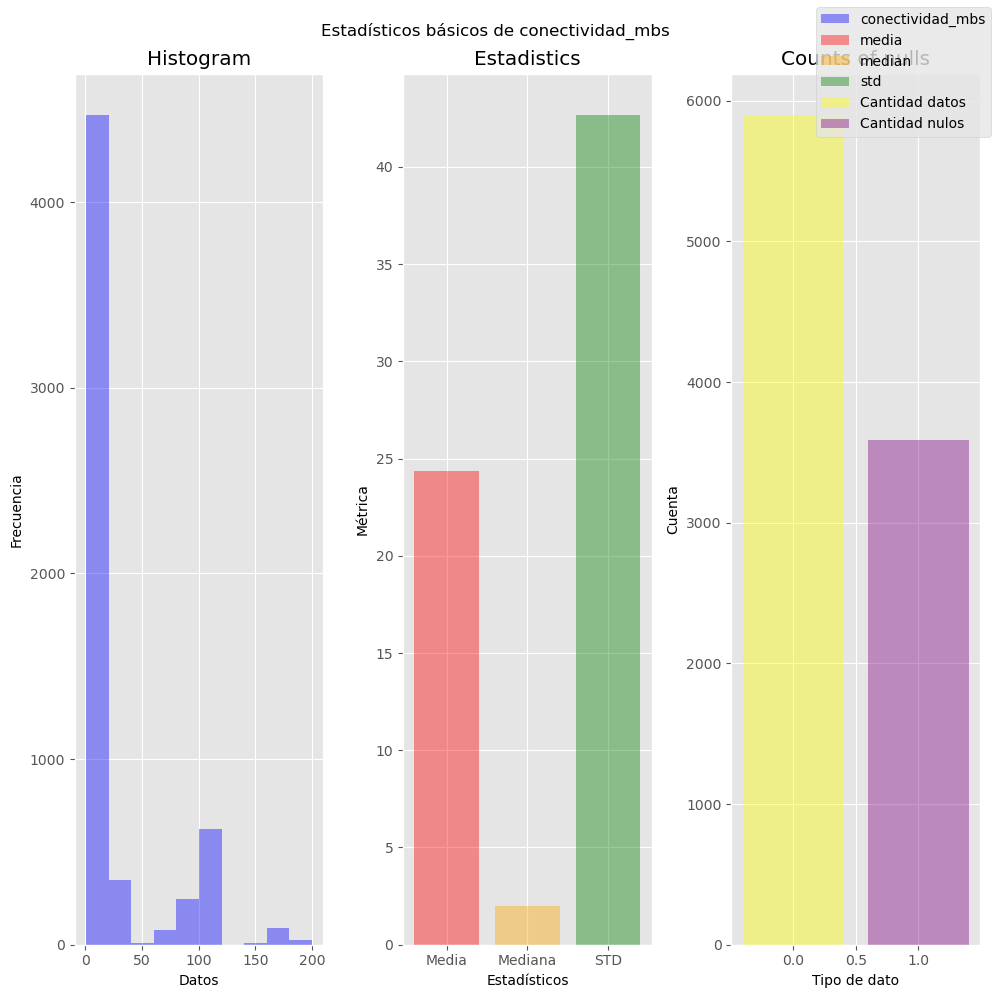

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

columna = 'conectividad_mbs'
# Histogram
df[columna].plot(kind='hist', ax=ax1, color='blue', alpha=0.4)


# Estadistics
ax2.bar(0, df[columna].mean(), label='media', color='red', alpha=0.4)
ax2.bar(1, df[columna].median(), label='median', color='orange', alpha=0.4)
ax2.bar(2, df[columna].std(), label='std', color='green', alpha=0.4)

# Data vs Nulls
nulos = df[columna].isnull().sum()
datos = len(df) - nulos

ax3.bar(0, datos, label='Cantidad datos', color='yellow', alpha=0.4)
ax3.bar(1, nulos, label='Cantidad nulos', color='purple', alpha=0.4)

fig.legend()

fig.suptitle(f'Estadísticos básicos de {columna}')


# Labels
ax1.set_xlabel('Datos')
ax1.set_ylabel('Frecuencia')

ax2.set_xlabel('Estadísticos')
ax2.set_xticks(range(3))
ax2.set_xticklabels(['Media', 'Mediana', 'STD'])
ax2.set_ylabel('Métrica')

ax3.set_xlabel('Tipo de dato')
ax3.set_ylabel('Cuenta')


# Títulos
ax1.set_title('Histogram')
ax2.set_title('Estadistics')
ax3.set_title('Counts of nulls')

fig.tight_layout()


##### Observations 
* The megas seem to be few, most are close to 25 although it is seen that there are _outliers_ of up to 100. 
* The average megas per property is about 6, the 50th percentile is at 2, so at least half of the data has 2MBs.
* There are almost twice as many properties that have internet.

In [52]:
to_delete_cols = ['beneficiarios_alimentos_dif_2014',
 'aulas_interactivas_observacion',
 'aulas_provisionales_observacion',
 'conectividad',
 'observacion_pec2013',
 'observacion_pec2014',
 'observacion_mobiliario',
 'inmueble']
df.drop(to_delete_cols,axis=1,inplace=True)
basedir = '.'
save_dir = os.path.join(basedir,'inversiones_with_regex.csv')
df.to_csv(save_dir)

In [53]:
save_dir

'.\\inversiones_with_regex.csv'